In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import stats
dataframe = pd.read_csv("data.csv")
dataframe



age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [2]:
dataframe.shape

(1338, 7)

In [3]:
duplicates = dataframe[dataframe.duplicated(keep=False)]
print(duplicates)

index_to_remove = 581
dataframe = dataframe.drop(index_to_remove)
dataframe = dataframe.reset_index(drop=True)
print(dataframe.shape)

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631
(1337, 7)


In [4]:
dataframe.describe()

age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010

In [5]:
dataframe.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
dataframe.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

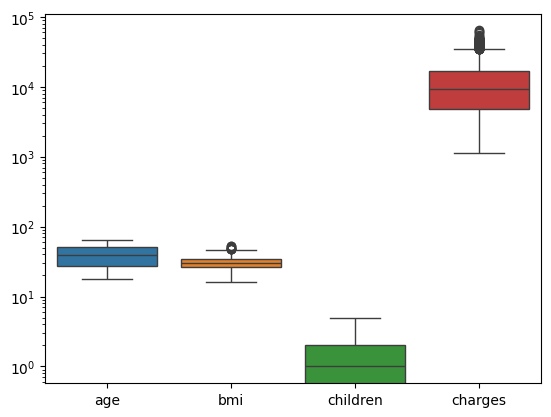

In [7]:
sns.boxplot(data=dataframe)
# sns.boxplot(data=dataframe)
plt.yscale("log")
plt.show()



In [8]:
#Le z-score (score z) est une mesure statistique qui quantifie l'écart d'une valeur par rapport à la moyenne d'un ensemble de données,
# exprimé en termes d'écart-type. Cela permet de déterminer à quel point une observation est éloignée de la moyenne d'une distribution normale.
# En résumé, le code identifie et imprime les observations de la variable 'bmi' dont le z-score est supérieur à 3,
# ce qui suggère qu'elles sont éloignées de la moyenne de la distribution. Cela pourrait indiquer la présence d'outliers dans les données.
# L'interprétation finale dépend du contexte spécifique de ton analyse et de la nature des données.

# Calculate the z-score for each variable
z = np.abs(stats.zscore(dataframe['bmi']))

# Identify outliers as students with a z-score greater than 3
threshold = 3
outliers = dataframe[z > threshold]

# Print the outliers
print(outliers)



      age   sex    bmi  children smoker     region     charges
116    58  male  49.06         0     no  southeast  11381.3254
846    23  male  50.38         1     no  southeast   2438.0552
1046   22  male  52.58         1    yes  southeast  44501.3982
1316   18  male  53.13         0     no  southeast   1163.4627


In [9]:
# Calculate the z-score for each variable
z = np.abs(stats.zscore(dataframe['age']))

# Identify outliers as students with a z-score greater than 3
threshold = 3
outliers = dataframe[z > threshold]

# Print the outliers
print(outliers)

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


In [10]:
# Calculate the z-score for each variable
z = np.abs(stats.zscore(dataframe['charges']))

# Identify outliers as students with a z-score greater than 3
threshold = 3
outliers = dataframe[z > threshold]

# Print the outliers
print(outliers)

      age     sex     bmi  children smoker     region      charges
34     28    male  36.400         1    yes  southwest  51194.55914
543    54  female  47.410         0    yes  southeast  63770.42801
577    31  female  38.095         1    yes  northeast  58571.07448
818    33  female  35.530         0    yes  northwest  55135.40209
1145   60    male  32.800         0    yes  southwest  52590.82939
1229   52    male  34.485         3    yes  northwest  60021.39897
1299   45    male  30.360         0    yes  southeast  62592.87309


In [11]:
# Calculate the z-score for each variable
z = np.abs(stats.zscore(dataframe['children']))

# Identify outliers as students with a z-score greater than 3
threshold = 3
outliers = dataframe[z > threshold]

# Print the outliers
print(outliers)

      age     sex     bmi  children smoker     region      charges
32     19  female  28.600         5     no  southwest   4687.79700
71     31    male  28.500         5     no  northeast   6799.45800
166    20  female  37.000         5     no  southwest   4830.63000
413    25    male  23.900         5     no  southwest   5080.09600
425    45    male  24.310         5     no  southeast   9788.86590
438    52  female  46.750         5     no  southeast  12592.53450
568    49  female  31.900         5     no  southwest  11552.90400
639    33    male  42.400         5     no  southwest   6666.24300
876    33    male  33.440         5     no  southeast   6653.78860
931    46    male  25.800         5     no  southwest  10096.97000
936    39  female  24.225         5     no  northwest   8965.79575
968    39  female  34.320         5     no  southeast   8596.82780
983    20    male  30.115         5     no  northeast   4915.05985
1084   39  female  18.300         5    yes  southwest  19023.2

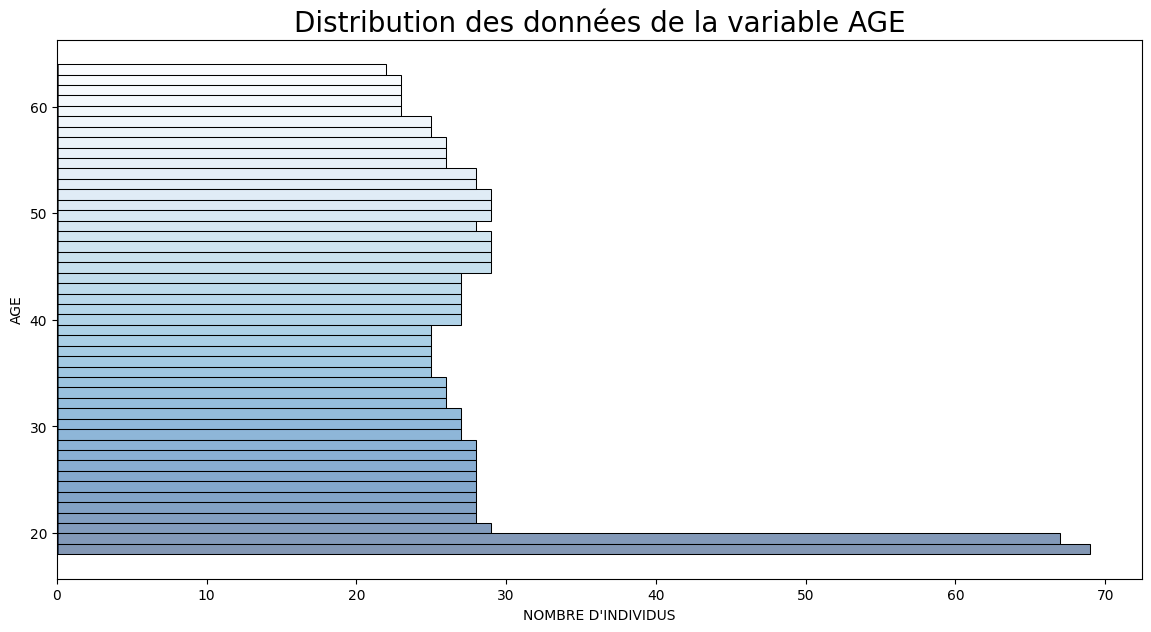

In [12]:
bins = 47
plt.figure(figsize=(14,7))
# custom_palette = sns.color_palette("mako", as_cmap=True)
plt.xlabel("NOMBRE D'INDIVIDUS")
plt.ylabel("AGE")
plt.title("Distribution des données de la variable AGE", fontsize=20)
sns.histplot(dataframe, y="age", bins=bins, hue="age", palette="Blues_r", legend=False)
plt.show()


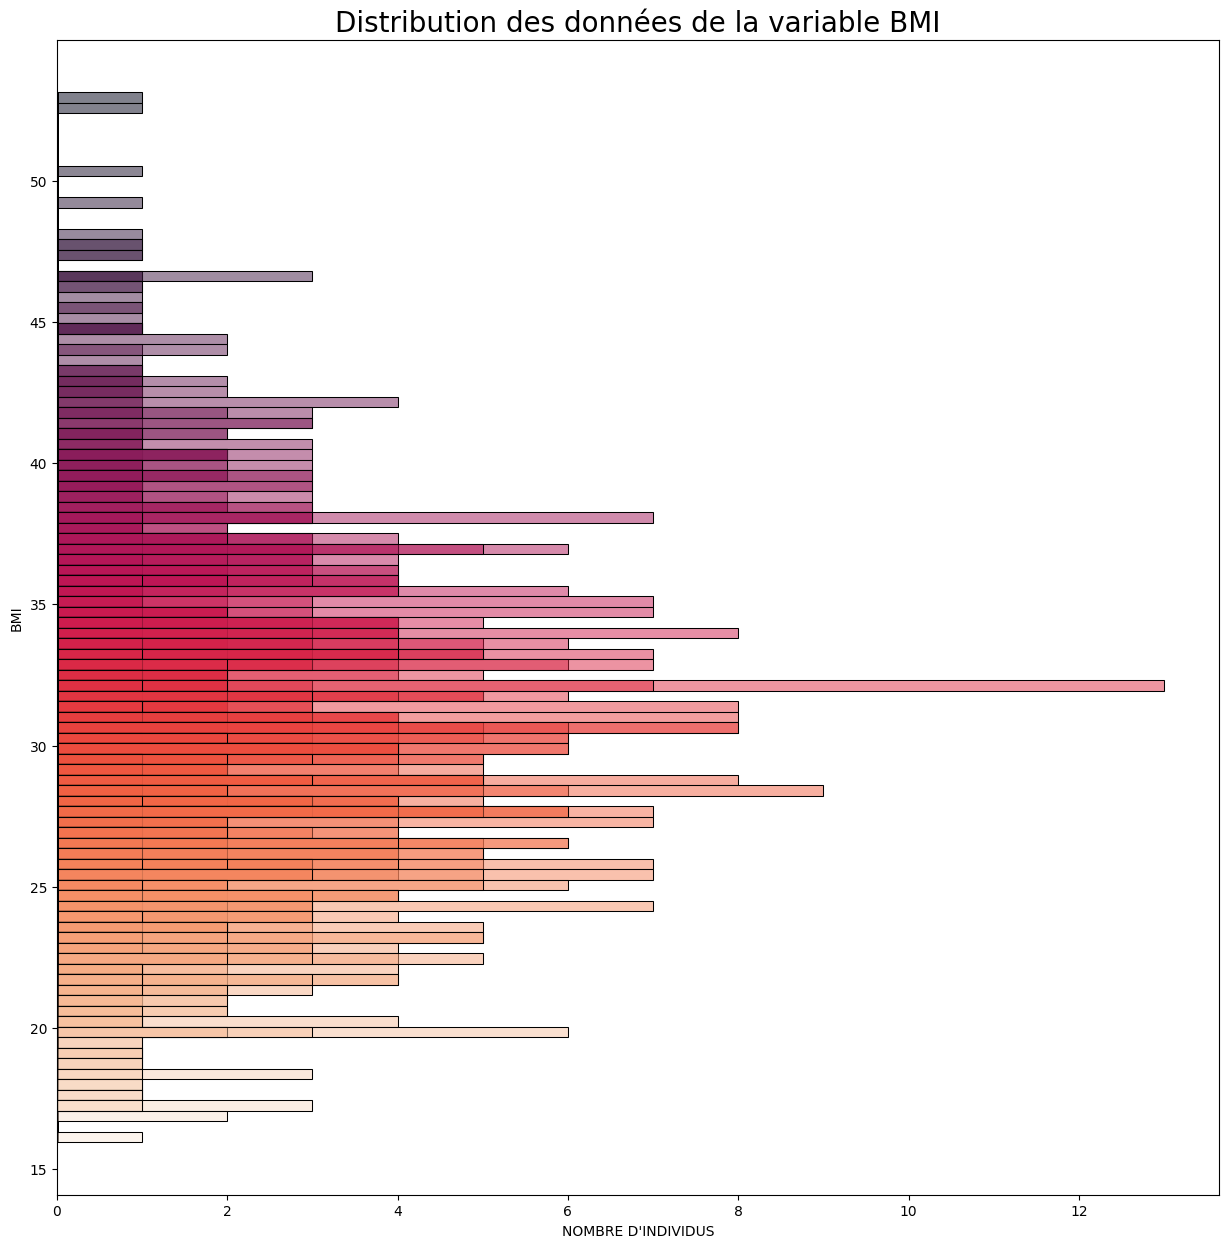

In [13]:
bins = 100

plt.figure(figsize=(15,15))
# custom_palette = sns.color_palette("mako", as_cmap=True)
plt.xlabel("NOMBRE D'INDIVIDUS")
plt.ylabel("BMI")
plt.title("Distribution des données de la variable BMI", fontsize=20)
sns.histplot(dataframe, bins=bins, y="bmi", hue="bmi", palette="rocket_r", legend=False)
plt.show()


In [14]:
# data_bmi = dataframe[["bmi", "bmi_categories"]]
# if data_bmi["bmi"] < 18.5:
#     data_bmi["bmi_categories"] = 0
# elif 24.9 >= data_bmi["bmi"] and data_bmi["bmi"] >= 18.5:
#     data_bmi["bmi_categories"] = 1
# elif 29.9 >= data_bmi["bmi"] and data_bmi["bmi"] >= 25.0:
#     data_bmi["bmi_categories"] = 2
# elif 34.9 >= data_bmi["bmi"] and data_bmi["bmi"] >= 30.0:
#     data_bmi["bmi_categories"] = 3
# elif 39.9 >= data_bmi["bmi"] and data_bmi["bmi"] >= 35.0:
#     data_bmi["bmi_categories"] = 4
# elif data_bmi["bmi"] >= 40.0:
#     data_bmi["bmi_categories"] = 5
    
    # Supposons que votre DataFrame s'appelle dataframe
# et que la colonne 'bmi' existe déjà en tant que colonne float

# Création de la nouvelle colonne 'bmi_categories' en utilisant la méthode apply
dataframe['bmi_categories'] = dataframe['bmi'].apply(lambda x: 0 if x < 18.5 else (1 if 18.5 <= x <= 24.9 else (2 if 25.0 <= x <= 29.9 else (3 if 30.0 <= x <= 34.9 else (4 if 35.0 <= x <= 39.9 else 5)))))

# Affichage du DataFrame résultant
dataframe
    

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1332   50    male  30.970         3     no  northwest  10600.54830   
1333   18  female  31.920         0     no  northeast   2205.98080   
1334   18  female  36.850         0     no  southeast   1629.83350   
1335   21  female  25.800         0     no  southwest   2007.94500   
1336   61  female  29.070         0    yes  northwest  29141.36030   

      bmi_categories  
0                  2  
1                  3  
2                  3  
3                  1  
4                  2  
...              ...  
1332               3  
1333               3  
1334               4  
1335               2  
1336               2  

[1337 rows x 8 columns]

In [15]:
hommes = dataframe["sex"] == "male"
nb_hommes = dataframe[hommes]["sex"].count()
nb_femmes = dataframe[~hommes]["sex"].count()
print(f"Total clients : {nb_hommes+nb_femmes}")
print(f"Nombre total d'hommes : {nb_hommes}")
print(f"Nombre total de femmes : {nb_femmes}")

Total clients : 1337
Nombre total d'hommes : 675
Nombre total de femmes : 662


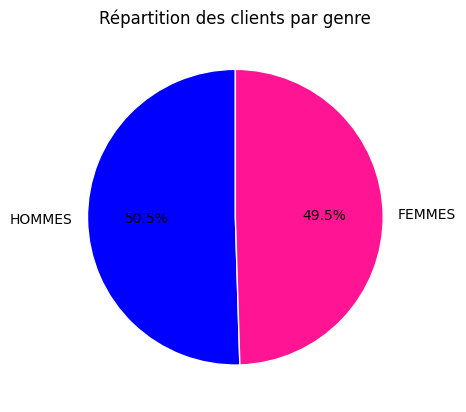

In [16]:
counts = dataframe['sex'].value_counts()
labels = ["HOMMES", "FEMMES"]
colors = ["blue", "deeppink"]

plt.pie(counts, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor':'white'})
plt.title('Répartition des clients par genre')
plt.show()


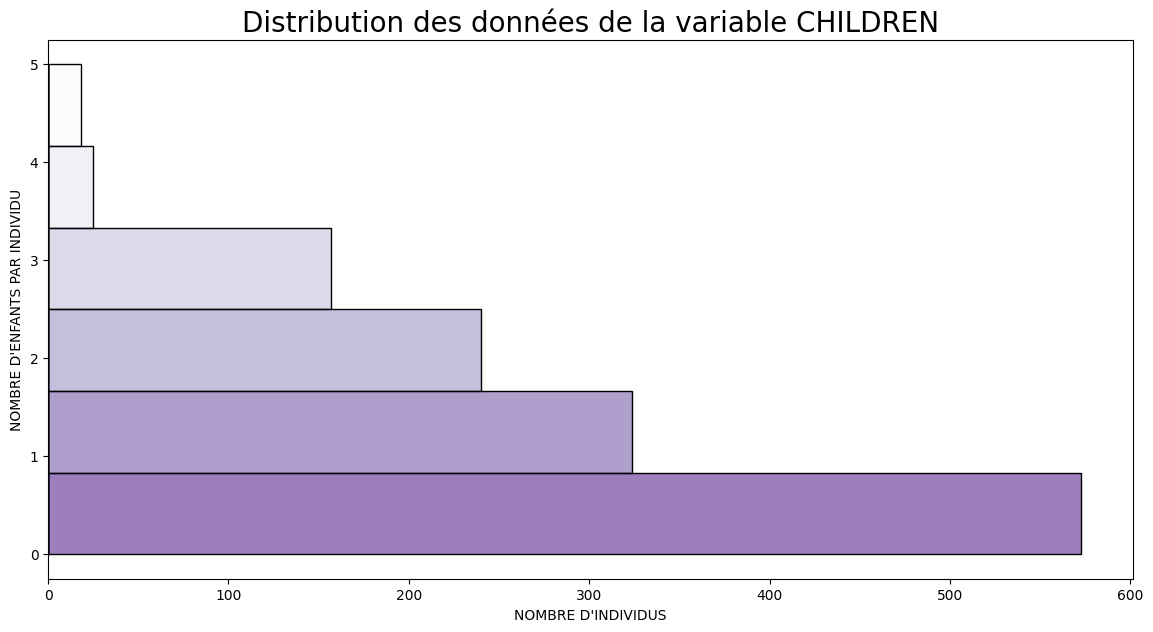

In [17]:
bins = len(dataframe["children"].value_counts())
plt.figure(figsize=(14,7))
plt.xlabel("NOMBRE D'INDIVIDUS")
plt.ylabel("NOMBRE D'ENFANTS PAR INDIVIDU")
plt.title("Distribution des données de la variable CHILDREN", fontsize=20)
sns.histplot(dataframe, y="children", bins=bins, hue="children", palette="Purples_r", legend=False)
plt.show()



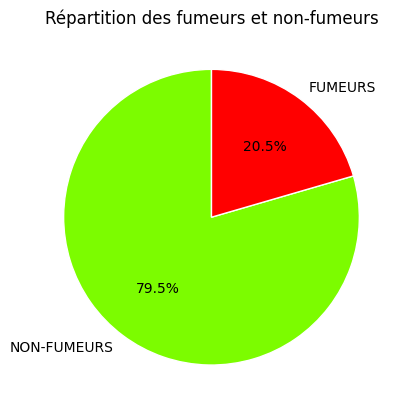

In [18]:
counts = dataframe['smoker'].value_counts()
labels = ["NON-FUMEURS", "FUMEURS"]
colors = ["lawngreen", "red"]

plt.pie(counts, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor':'white'})
plt.title('Répartition des fumeurs et non-fumeurs')
plt.show()



In [19]:
# TRANSFORMATION DES VALEURS "YES" ET "NO" EN 0 ET 1
dataframe["smoker"] = dataframe["smoker"].replace({"no": 0, "yes" : 1})
dataframe


age     sex     bmi  children  smoker     region      charges  \
0      19  female  27.900         0       1  southwest  16884.92400   
1      18    male  33.770         1       0  southeast   1725.55230   
2      28    male  33.000         3       0  southeast   4449.46200   
3      33    male  22.705         0       0  northwest  21984.47061   
4      32    male  28.880         0       0  northwest   3866.85520   
...   ...     ...     ...       ...     ...        ...          ...   
1332   50    male  30.970         3       0  northwest  10600.54830   
1333   18  female  31.920         0       0  northeast   2205.98080   
1334   18  female  36.850         0       0  southeast   1629.83350   
1335   21  female  25.800         0       0  southwest   2007.94500   
1336   61  female  29.070         0       1  northwest  29141.36030   

      bmi_categories  
0                  2  
1                  3  
2                  3  
3                  1  
4                  2  
...              ...  
1332               3  
1333               3  
1334               4  
1335               2  
1336               2  

[1337 rows x 8 columns]

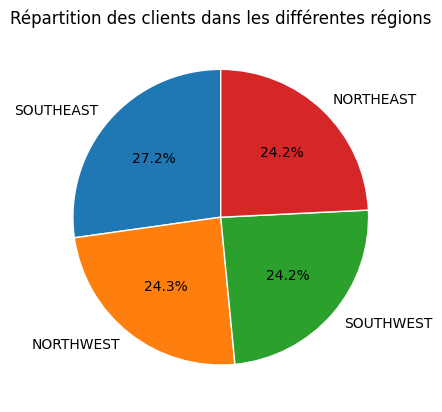

In [20]:
region_counts = dataframe['region'].value_counts()
labels = ["SOUTHEAST", "NORTHWEST","SOUTHWEST", "NORTHEAST" ]
colors = [""]

plt.pie(region_counts, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor':'white'})
plt.title('Répartition des clients dans les différentes régions')
plt.show()



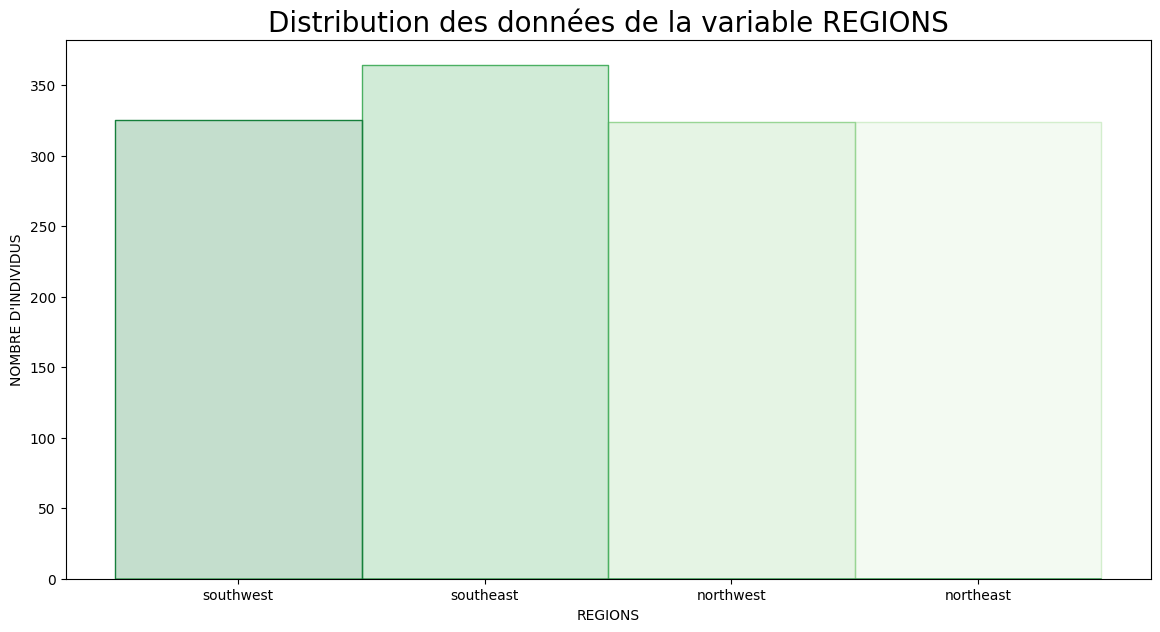

In [21]:
plt.figure(figsize=(14,7))
plt.ylabel("NOMBRE D'INDIVIDUS")
plt.xlabel("REGIONS")
plt.title("Distribution des données de la variable REGIONS", fontsize=20)
sns.histplot(dataframe, x="region", hue="region", palette="Greens_r", legend=False, binwidth=5, element="step")
plt.show()



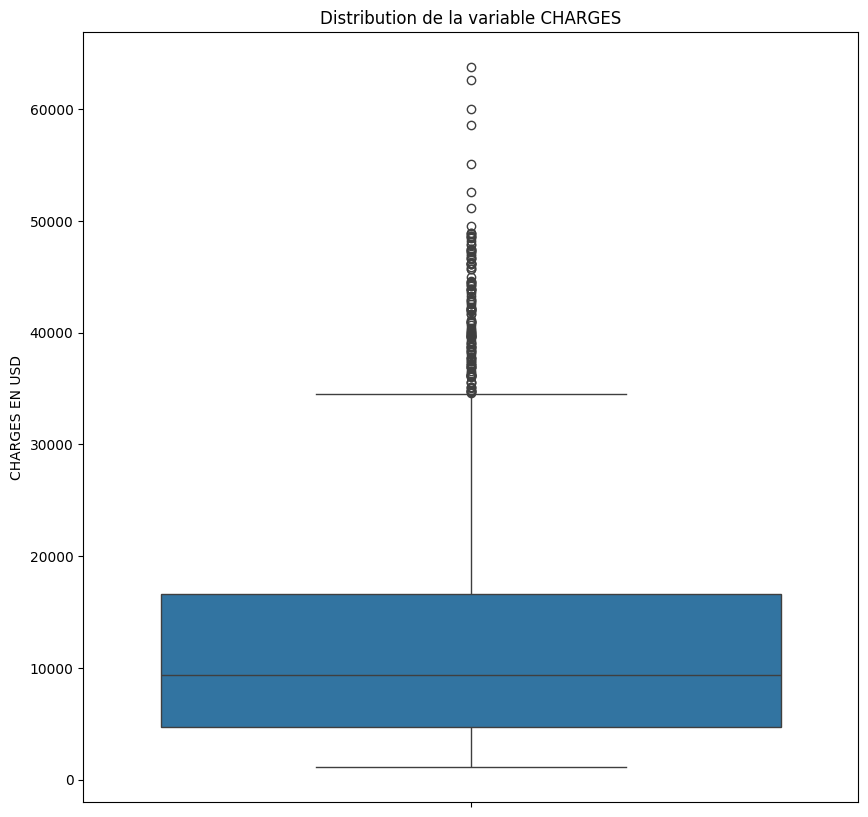

In [22]:
plt.figure(figsize=(10,10))
plt.title("Distribution de la variable CHARGES")
sns.boxplot(dataframe["charges"])
plt.ylabel("CHARGES EN USD")
plt.show()

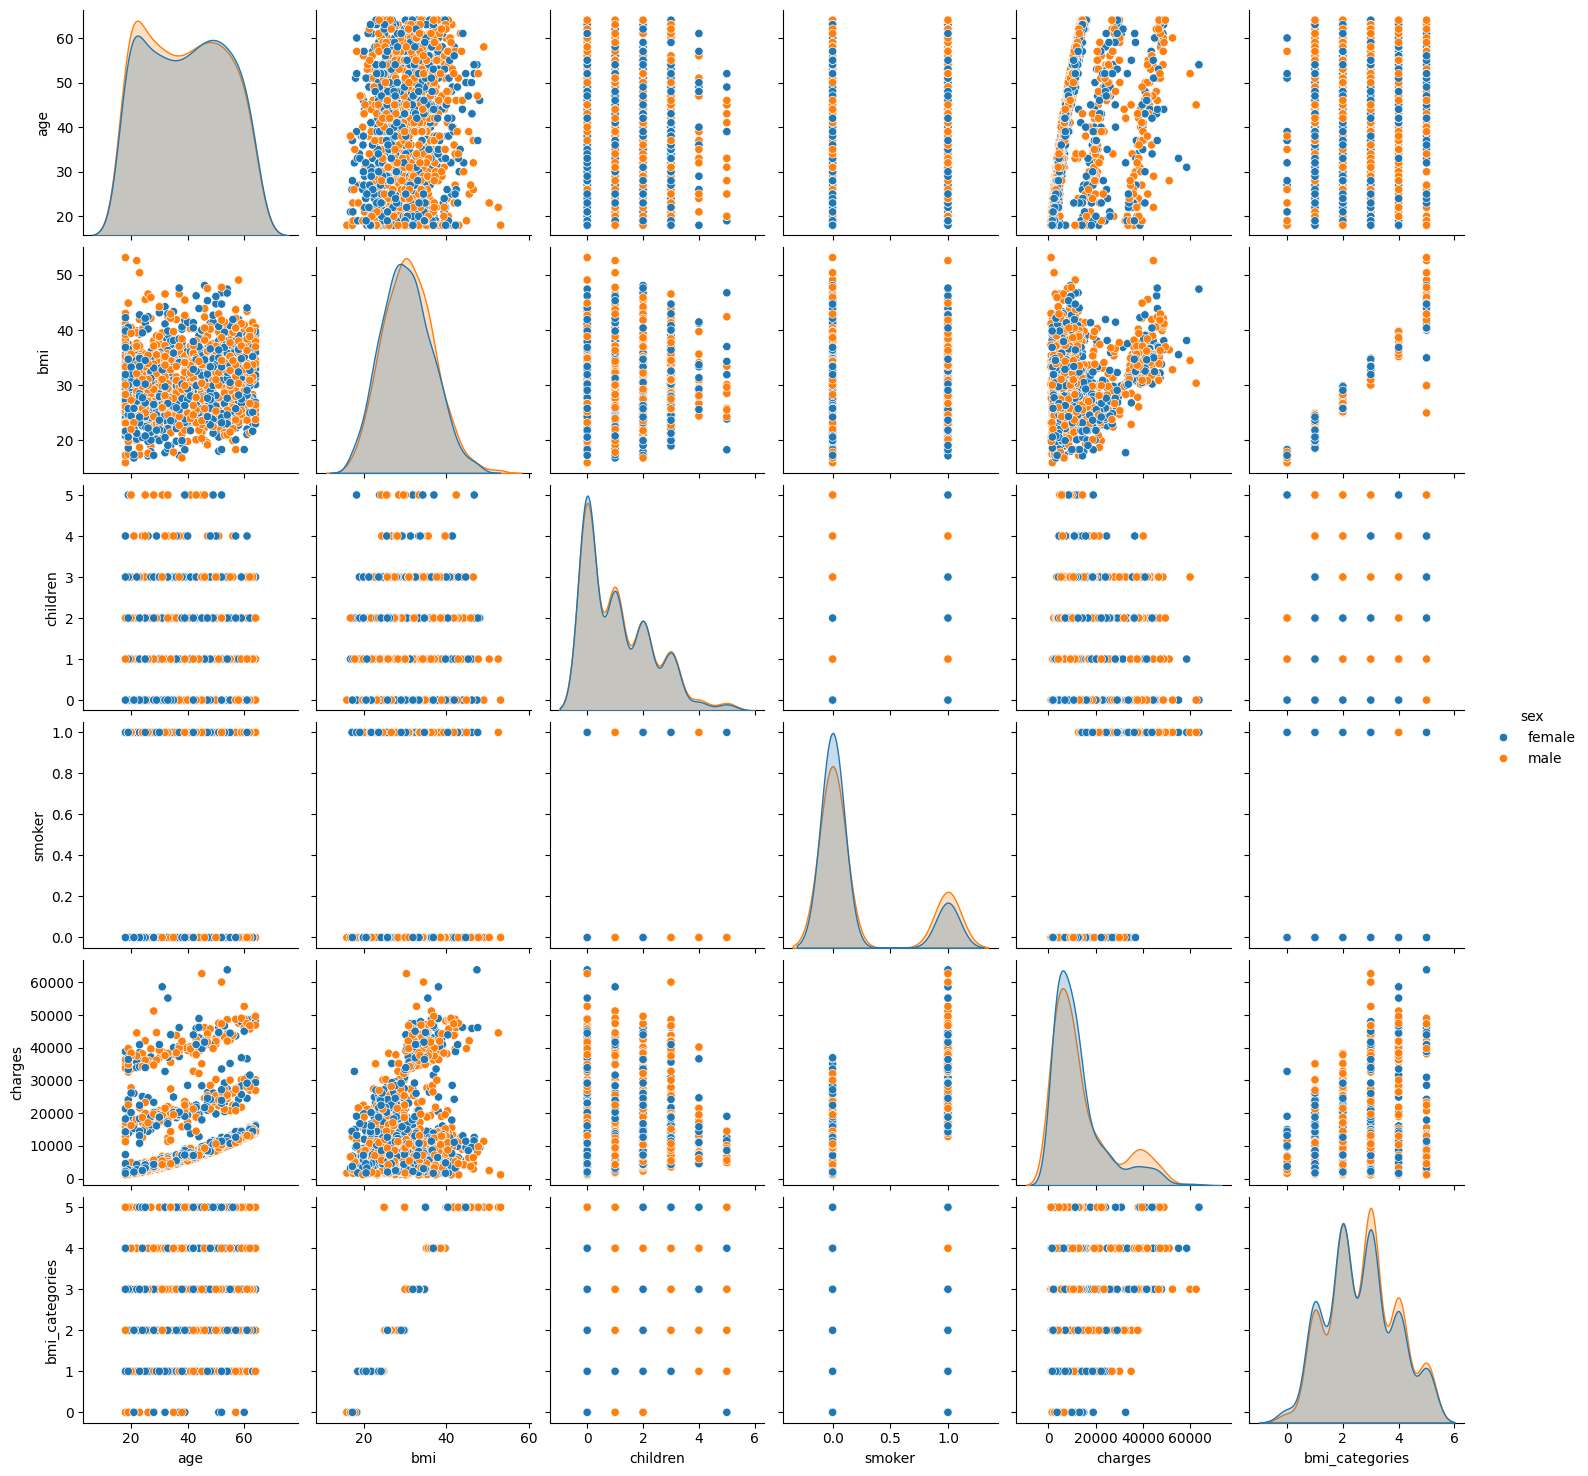

In [23]:
sns.pairplot(dataframe, hue="sex")

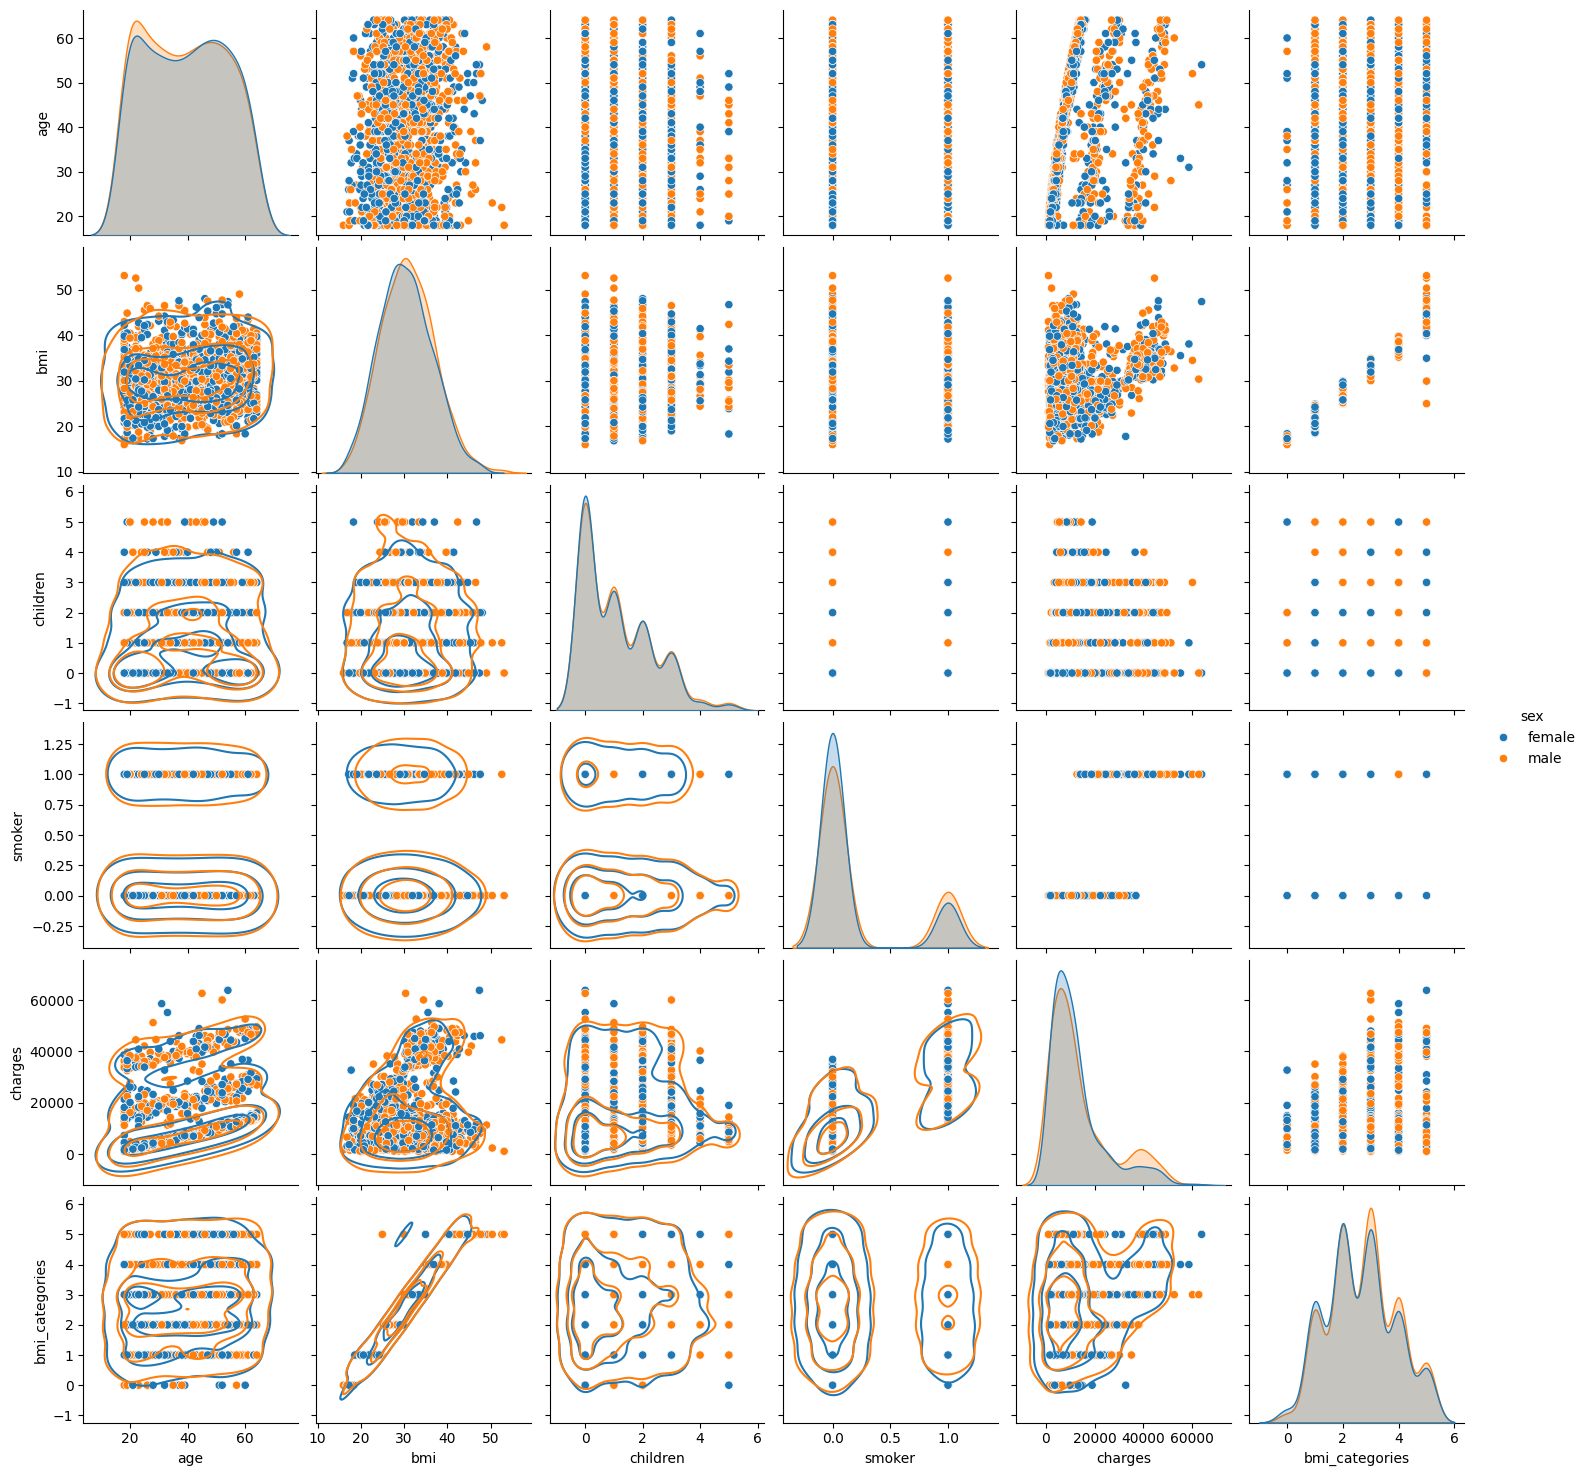

In [24]:
g = sns.pairplot(dataframe, diag_kind="kde", hue="sex")
g.map_lower(sns.kdeplot, levels=4, color=".2")

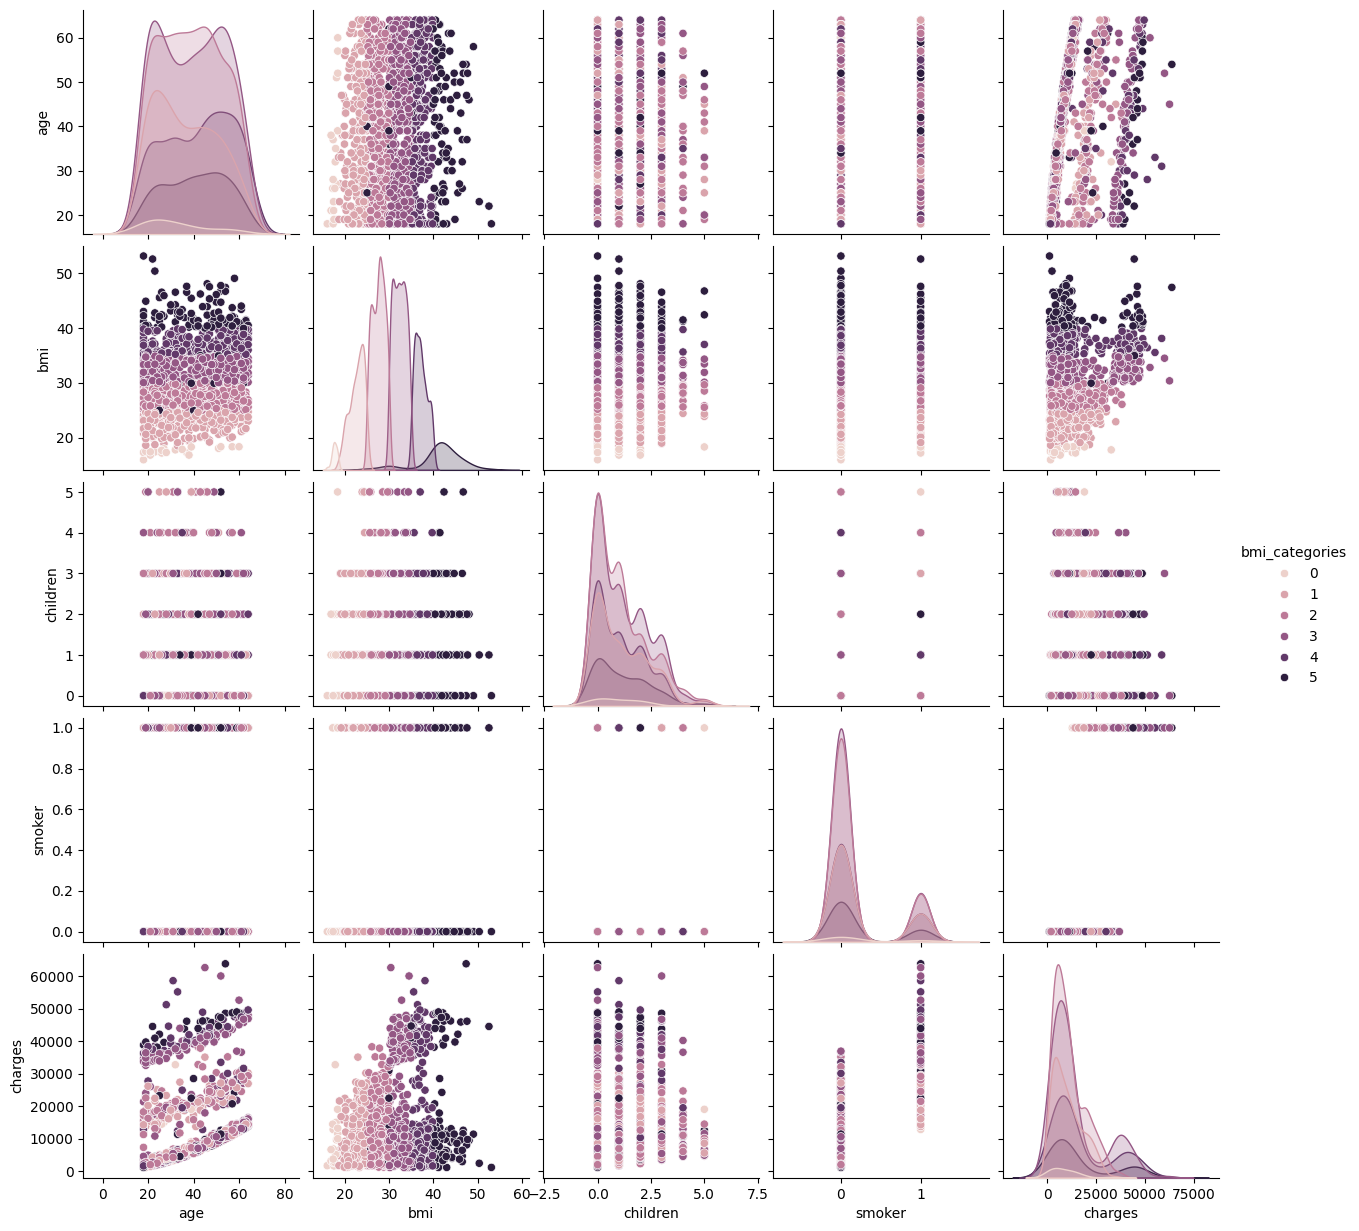

In [25]:
sns.pairplot(dataframe, hue="bmi_categories")
plt.show()

In [26]:
groupby_df = dataframe[["sex", "bmi_categories", "smoker", "charges", "age_category"]]
groupby_df = groupby_df.groupby(["sex", "bmi_categories", "smoker"]).mean("charges").sort_values(by="charges", ascending=False)
groupby_df 

KeyError: "['age_category'] not in index"

In [ ]:
groupby_df2 = dataframe[["sex", "bmi_categories", "smoker", "charges", "age_category"]]
groupby_df2.groupby(["age_category", "sex", "smoker"]).mean("charges").sort_values(by="charges", ascending=False)

KeyError: "['age_category'] not in index"

In [ ]:
# TRANSFORMATION DES VALEURS "YES" ET "NO" EN 0 ET 1
dataframe["sex"] = dataframe["sex"].replace({"male": 0, "female" : 1})
dataframe

age  sex     bmi  children  smoker     region      charges  \
0      19    1  27.900         0       1  southwest  16884.92400   
1      18    0  33.770         1       0  southeast   1725.55230   
2      28    0  33.000         3       0  southeast   4449.46200   
3      33    0  22.705         0       0  northwest  21984.47061   
4      32    0  28.880         0       0  northwest   3866.85520   
...   ...  ...     ...       ...     ...        ...          ...   
1332   50    0  30.970         3       0  northwest  10600.54830   
1333   18    1  31.920         0       0  northeast   2205.98080   
1334   18    1  36.850         0       0  southeast   1629.83350   
1335   21    1  25.800         0       0  southwest   2007.94500   
1336   61    1  29.070         0       1  northwest  29141.36030   

      bmi_categories  
0                  2  
1                  3  
2                  3  
3                  1  
4                  2  
...              ...  
1332               3  
1333               3  
1334               4  
1335               2  
1336               2  

[1337 rows x 8 columns]

-0.0580444957903129

age       sex       bmi  children    smoker   charges  \
age             1.000000  0.019814  0.109344  0.041536 -0.025587  0.298308   
sex             0.019814  1.000000 -0.046397 -0.017848 -0.076596 -0.058044   
bmi             0.109344 -0.046397  1.000000  0.012755  0.003746  0.198401   
children        0.041536 -0.017848  0.012755  1.000000  0.007331  0.067389   
smoker         -0.025587 -0.076596  0.003746  0.007331  1.000000  0.787234   
charges         0.298308 -0.058044  0.198401  0.067389  0.787234  1.000000   
bmi_categories  0.110449 -0.037308  0.941079  0.001189  0.005490  0.201437   

                bmi_categories  
age                   0.110449  
sex                  -0.037308  
bmi                   0.941079  
children              0.001189  
smoker                0.005490  
charges               0.201437  
bmi_categories        1.000000

In [ ]:
# Assuming 'dataframe' is your original DataFrame
# You may need to replace 'dataframe' with your actual DataFrame name

# Create binary columns for each region
dataframe_pivoted = pd.get_dummies(dataframe, columns=['region'])

# Set the binary region columns to 1 if the original 'region' column had a non-null value
for col in dataframe_pivoted.columns:
    if col.startswith('region_'):
        dataframe_pivoted[col] = dataframe_pivoted[col].apply(lambda x: 1 if x == 1 else 0)

# Display the resulting DataFrame
dataframe_pivoted



age  sex     bmi  children  smoker      charges  bmi_categories  \
0      19    1  27.900         0       1  16884.92400               2   
1      18    0  33.770         1       0   1725.55230               3   
2      28    0  33.000         3       0   4449.46200               3   
3      33    0  22.705         0       0  21984.47061               1   
4      32    0  28.880         0       0   3866.85520               2   
...   ...  ...     ...       ...     ...          ...             ...   
1332   50    0  30.970         3       0  10600.54830               3   
1333   18    1  31.920         0       0   2205.98080               3   
1334   18    1  36.850         0       0   1629.83350               4   
1335   21    1  25.800         0       0   2007.94500               2   
1336   61    1  29.070         0       1  29141.36030               2   

      region_northeast  region_northwest  region_southeast  region_southwest  
0                    0                 0                 0                 1  
1                    0                 0                 1                 0  
2                    0                 0                 1                 0  
3                    0                 1                 0                 0  
4                    0                 1                 0                 0  
...                ...               ...               ...               ...  
1332                 0                 1                 0                 0  
1333                 1                 0                 0                 0  
1334                 0                 0                 1                 0  
1335                 0                 0                 0                 1  
1336                 0                 1                 0                 0  

[1337 rows x 11 columns]

In [ ]:
#Corrélation entre toutes les colonnes

dataframe.corr(numeric_only=True)


In [ ]:
#Corrélation Pearson avec la target (charges) et autres variables

corr_age = dataframe['charges'].corr(dataframe['age'])
corr_age

corr_bmi = dataframe['charges'].corr(dataframe['bmi'])
corr_bmi

corr_smoker = dataframe['charges'].corr(dataframe['smoker'])
corr_smoker

corr_children = dataframe['charges'].corr(dataframe['children'])
corr_children

corr_sex = dataframe['charges'].corr(dataframe['sex'])
corr_sex


# On ne retrouve qu'une très forte corrélation positive entre la variable charges et smoker : 0.79.
# Corrélation entre charges et BMI : 0.20 donc faible relation linéaire...
# Corrélation entre charges et age : 0.30 donc faible relation linéaire...
# Corrélation entre charges et children : 0.07 donc relation linéaire inexistante
# Corréltion entre charges et sexe : -0.06 donc relation linéaire inexistante 

In [ ]:
import scipy.stats as stats

# Supposons que vous ayez un DataFrame appelé "dataframe" avec les colonnes "bmi_categories" et "region"
contingency_table = pd.crosstab(dataframe["bmi_categories"], dataframe["region"])

statistique, p_value, _, _ = stats.chi2_contingency(contingency_table)

print("Statistique de test Chi-deux :", statistique)
print("Valeur de p :", p_value)


Statistique de test Chi-deux : 125.7885423436821
Valeur de p : 1.4149031950242656e-19


In [ ]:
import scipy.stats as stats

# Supposons que vous ayez un DataFrame appelé "dataframe" avec les colonnes "bmi_categories" et "region"
contingency_table = pd.crosstab(dataframe["sex"], dataframe["bmi_categories"])

statistique, p_value, _, _ = stats.chi2_contingency(contingency_table)

print("Statistique de test Chi-deux :", statistique)
print("Valeur de p :", p_value)


Statistique de test Chi-deux : 2.6281285932499996
Valeur de p : 0.7570869671240782


In [ ]:
import scipy.stats as stats

statistique, p_value = stats.f_oneway(dataframe["region"], dataframe["charges"])

print("Statistique de test ANOVA :", statistique)
print("Valeur de p :", p_value)

In [ ]:
dataframe
dataframe.to_csv("clean_data.csv", index=False)

In [ ]:
dataframe.head(2)
df = dataframe.drop(['sex', "region", "children", "bmi_categories"], axis=1)
df 

age     bmi  smoker      charges
0      19  27.900       1  16884.92400
1      18  33.770       0   1725.55230
2      28  33.000       0   4449.46200
3      33  22.705       0  21984.47061
4      32  28.880       0   3866.85520
...   ...     ...     ...          ...
1332   50  30.970       0  10600.54830
1333   18  31.920       0   2205.98080
1334   18  36.850       0   1629.83350
1335   21  25.800       0   2007.94500
1336   61  29.070       1  29141.36030

[1337 rows x 4 columns]

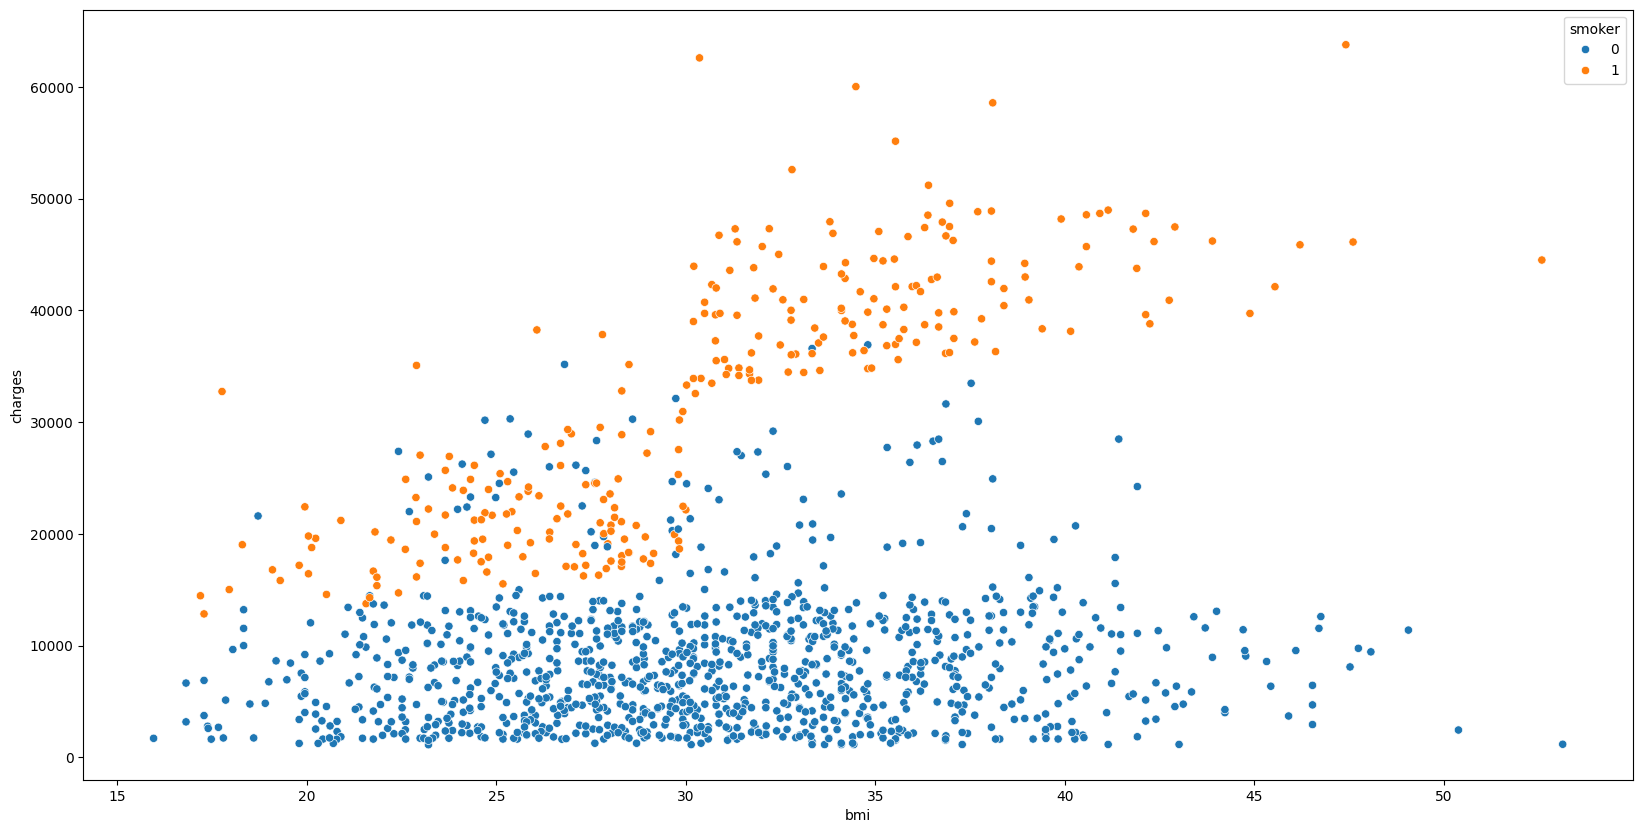

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker")
plt.show()

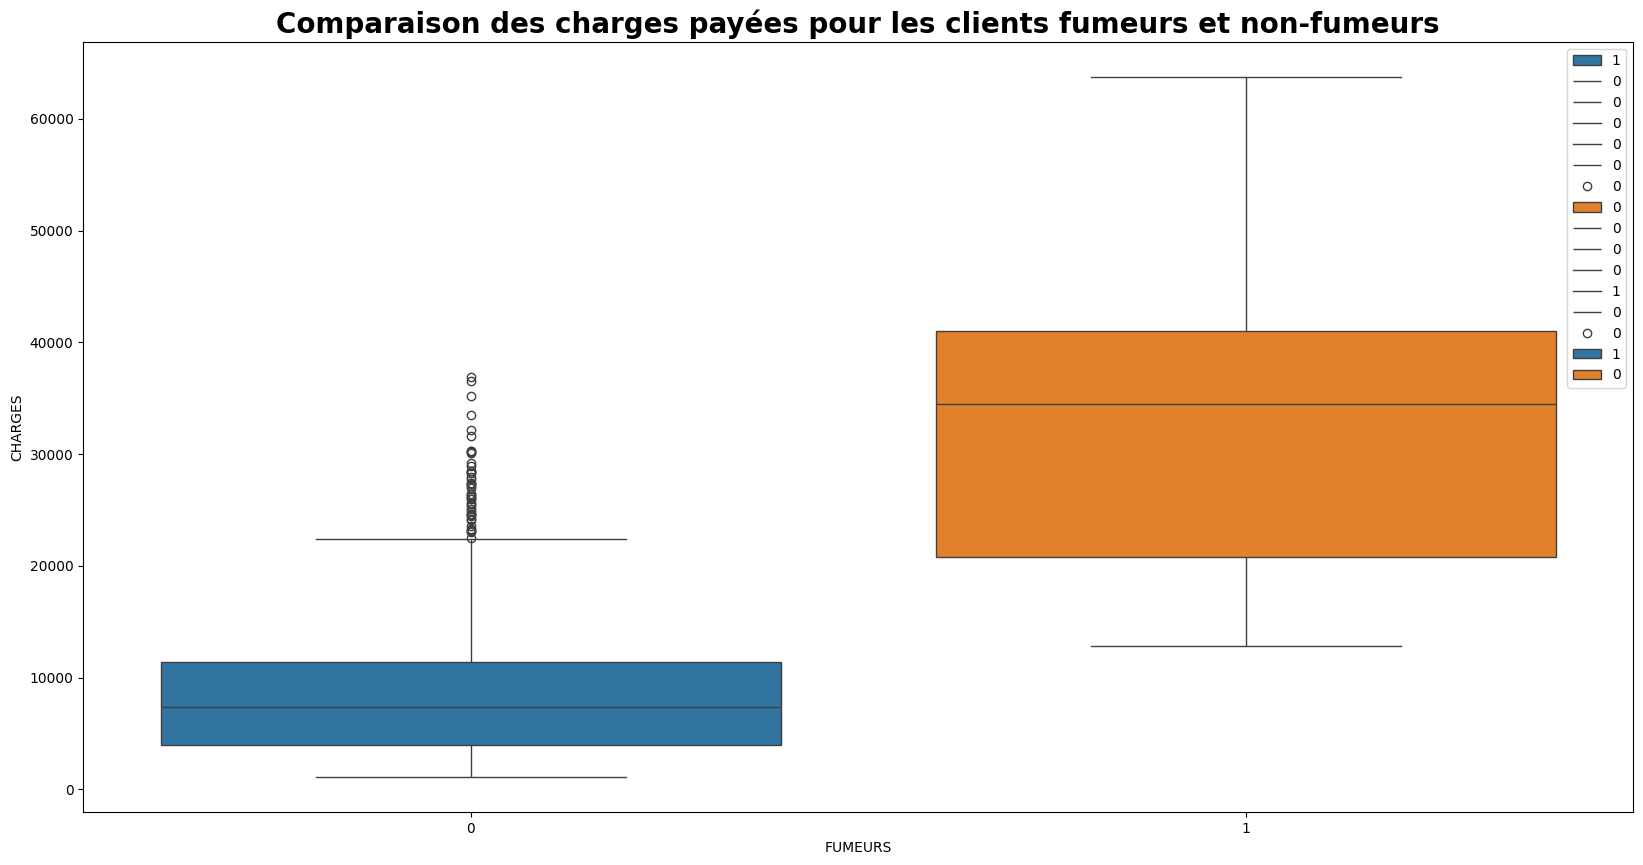

In [ ]:
x = dataframe.smoker   
y = dataframe.charges
plt.figure(figsize=(20,10))
sns.boxplot(x=x, y=y, hue=x)
plt.ylabel("CHARGES")
plt.xlabel("FUMEURS")
plt.legend(x)
# plt.yscale("log")
plt.title("Comparaison des charges payées pour les clients fumeurs et non-fumeurs", fontsize=20, weight="bold")
plt.show()

